## realise par : 
- **Soufiane SEJJARI**

----------------------------

### le source donnes :
- les etudiants de l'ensias qui ont un parcours proche de data sience 
- 58 profiles scrappe depuis le lien :https://www.linkedin.com/school/ecole-nationale-superieure-d-informatique-et-d-analyse-des-systemes/people/?educationEndYear=2021
- ciblage : les etudiant qui termine leurs etude avant de 2022


In [ ]:
from pymongo import MongoClientQ
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:

# Connect to the MongoDB server
client = MongoClient()
# Select the database and collection you want to work with
db = client.linkden
collection = db.profiles


#### Analyser les compétences d’un Data	**scientist/Data	Science**	
premier etape  quells sont les mot cle qui signifie que un persson est un scientist/Data	Science ?

In [155]:
results = collection.aggregate([
  {"$unwind": "$work"},
  {"$group": {"_id": "$basics.label", "count": {"$sum": 1}}},
  {"$sort": {"count": -1}}
])
df = pd.DataFrame(results)

# Display the DataFrame
df.head(10)

,_id,count
0,Data Scientist | Business Intelligence / data at MERCURE IT - SGMA | PhD student,12
1,PhD / Ing\u00e9nieur en s\u00e9curit\u00e9 des syst\u00e8mes d'information,9
2,Tech & team lead,8
3,Software engineer at Heliantha,8
4,SQA Analyst & Data Analyst,7
5,Consultante Webmethods chez CREDIT DU MAROC,6
6,Data Scientist | Data Analyst| AI Researcher | Computer Science Trainer,6
7,Consultant BI,6
8,D\u00e9veloppeur Big Data / Cloud Data Engineer,6
9,Consultante Data Scientist chez D-AIM,6


 #### les	compétences	d’un	Data	scientist/Data	Science	

In [303]:

# Perform the aggregation pipeline
results = collection.aggregate([
    
  {"$match": {
    "$or": [
      { "basics.label": { "$regex": "data scientist", "$options": "i" } },
      { "basics.label": { "$regex": "data science", "$options": "i" } },
      { "basics.label": { "$regex": "Analyst", "$options": "i" } },
      { "basics.label": { "$regex": "Intelligence", "$options": "i" } }

    ]
  }},
  {"$unwind": "$skills"},
  {"$group": {"_id": "$skills.name", "count": {"$sum": 1}}},
  {"$sort": {"count": -1}}

                            ])

In [304]:

data = list(results)
df = pd.DataFrame(data)

# Display the DataFrame
df

,_id,count
0,Python,11
1,MySQL,10
2,PL/SQL,9
3,SQL,9
4,Java,9
5,C,7
6,Machine Learning,7
7,JavaScript,6
8,Microsoft Power BI,6
9,C#,6


#### Top	20	des	compétences	de		data	scientists

In [305]:
result2=collection.aggregate([
  {"$match": {
    "$or": [
      { "basics.label": { "$regex": "data scientist", "$options": "i" } },
      { "basics.label": { "$regex": "data science", "$options": "i" } },
      { "basics.label": { "$regex": "Analyst", "$options": "i" } },
      { "basics.label": { "$regex": "Intelligence", "$options": "i" } }

    ]
  }},
  {"$unwind": "$skills"},
  {"$group": {"_id": "$skills.name", "count": {"$sum": 1}}},
  {"$sort": {"count": -1}},
  {"$limit": 20}
])

data = list(result2)
df = pd.DataFrame(data)

# Display the DataFrame
df.head(10)


,_id,count
0,Python,11
1,MySQL,10
2,PL/SQL,9
3,Java,9
4,SQL,9
5,C,7
6,Machine Learning,7
7,Microsoft Power BI,6
8,JavaScript,6
9,Informatique d\u00e9cisionnelle,6


#### Plot the results as a bar chart

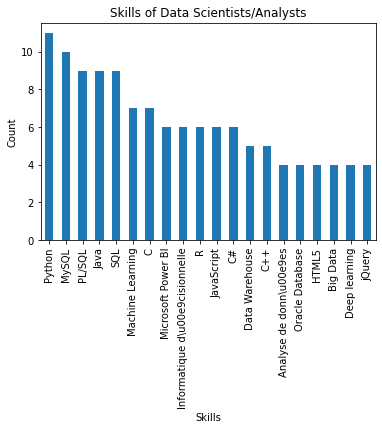

In [153]:

df.plot(kind='bar', x='_id', y='count', legend=False)
plt.xlabel("Skills")
plt.ylabel("Count")
plt.title("Skills of Data Scientists/Analysts")
plt.show()

###  3. Catégoriser	les		emplois	/	compétence	des	Data	Scientist	
#### les emplois  en realtion de data sience  avec les compétence

In [150]:
result3=collection.aggregate([
  {"$match": {
    "$or": [
      { "basics.label": { "$regex": "data scientist", "$options": "i" } },
      { "basics.label": { "$regex": "data science", "$options": "i" } },
      { "basics.label": { "$regex": "Analyst", "$options": "i" } },
      { "basics.label": { "$regex": "Intelligence", "$options": "i" } }

    ]
  }},
  {"$unwind": "$skills"},
  { "$group": {
    "_id": { "position": "$work.position", "skill": "$skills.name" },
    "skills": { "$push": "$skills.name" }
  }},
  { "$group": {
    "_id": "$_id.position",
    "skills": { "$push": { "skill": "$_id.skill", "count": { "$size": "$skills" } } }
  }},
  { "$sort": { "_id": 1 } }
])

In [151]:
data = list(result3)
df = pd.DataFrame(data)

# Display the DataFrame
df


,_id,skills
0,[],"[{'skill': 'C (Programming Language)', 'count': 1}, {'skill': 'Natural Language Processing (NLP)', 'count': 1}, {'skill': 'Python (Programming Language)', 'count': 1}, {'skill': 'RStudio', 'count': 1}, {'skill': 'R', 'count': 1}, {'skill': 'Machine Learning', 'count': 1}, {'skill': 'Data Science', 'count': 1}, {'skill': 'GNU Octave', 'count': 1}, {'skill': 'Deep Learning', 'count': 1}, {'skill': 'Big Data', 'count': 1}, {'skill': 'Big Data Analytics', 'count': 1}, {'skill': 'SPARQL', 'count': 1}, {'skill': 'Sentiment Analysis', 'count': 1}, {'skill': 'Java', 'count': 1}]"
1,"[Analyste d\u00e9veloppeur en COBOL/MVS, D\u00e9veloppeur et analyste en COBOL/MVS \u2013 Freelance, D\u00e9veloppeur et analyste confirm\u00e9 en COBOL/MVS]","[{'skill': 'Oracle', 'count': 1}, {'skill': 'JAVA', 'count': 1}, {'skill': 'XML', 'count': 1}, {'skill': 'COBOL', 'count': 1}, {'skill': 'C#', 'count': 1}, {'skill': 'MySQL', 'count': 1}, {'skill': 'UML', 'count': 1}, {'skill': 'ASP.NET', 'count': 1}, {'skill': 'J2ME', 'count': 1}]"
2,"[BI Engineer, Skilling The African Youth, Data Scientist Intern, Research intern, Data Scientist, Business Intelligence Developer, intern, Android Developer, intern]","[{'skill': 'Big Data', 'count': 1}, {'skill': 'Datawarehouse', 'count': 1}, {'skill': 'D\u00e9veloppement d\u2019applications Web', 'count': 1}, {'skill': 'Intelligence artificielle', 'count': 1}, {'skill': 'Tensorflow', 'count': 1}, {'skill': 'Data Collection', 'count': 1}, {'skill': 'Tableau', 'count': 1}, {'skill': 'Data Warehouse', 'count': 1}, {'skill': 'Recherche', 'count': 1}, {'skill': 'Java', 'count': 1}, {'skill': 'D\u00e9veloppement d\u2019applications', 'count': 1}, {'skill': 'Linux', 'count': 1}, {'skill': 'Visualisation de donn\u00e9es', 'count': 1}, {'skill': 'SQL', 'count': 1}, {'skill': 'Machine learning', 'count': 1}, {'skill': 'Apprentissage automatique', 'count': 1}, {'skill': 'Exploration des donn\u00e9es', 'count': 1}, {'skill': 'Deep learning', 'count': 1}, {'skill': 'Data analysis', 'count': 1}, {'skill': 'Microsoft Power BI', 'count': 1}, {'skill': 'Informati..."
3,[Business Analyst],"[{'skill': 'Oracle Database', 'count': 1}, {'skill': 'Problem Solving', 'count': 1}, {'skill': 'Analytical Skills', 'count': 1}, {'skill': 'Analyse de donn\u00e9es', 'count': 1}, {'skill': 'Traitement num\u00e9rique des images', 'count': 1}, {'skill': 'deep learning', 'count': 1}, {'skill': 'R', 'count': 1}, {'skill': 'Business Analysis', 'count': 1}, {'skill': 'PL/SQL', 'count': 1}, {'skill': 'Requirements Analysis', 'count': 1}, {'skill': 'Python', 'count': 1}, {'skill': 'Organization Skills', 'count': 1}, {'skill': 'machine learning', 'count': 1}, {'skill': 'Java', 'count': 1}]"
4,"[Business Analyst, Business Analyst, Software Developer ]","[{'skill': 'C', 'count': 1}, {'skill': 'Math\u00e9matiques', 'count': 1}, {'skill': 'C#', 'count': 1}, {'skill': 'D\u00e9veloppement de logiciels', 'count': 1}, {'skill': 'Python', 'count': 1}, {'skill': 'GIT', 'count': 1}, {'skill': 'Java', 'count': 1}, {'skill': 'Programmation orient\u00e9e objet', 'count': 1}, {'skill': 'Programmation', 'count': 1}, {'skill': 'GitHub', 'count': 1}]"
5,"[Consultante Data Scientist, Data Scientist Intern, Data analyst intern, Pr\u00e9sidente, Membre du comit\u00e9, Software developer]","[{'skill': 'Statistiques', 'count': 1}, {'skill': 'SQLite', 'count': 1}, {'skill': 'Gestion de projet', 'count': 1}, {'skill': 'Python', 'count': 1}, {'skill': 'Microsoft SQL Server', 'count': 1}, {'skill': 'Exploration des donn\u00e9es', 'count': 1}, {'skill': 'R\u00e9seaux de neurones ', 'count': 1}, {'skill': 'Time series analysis', 'count': 1}, {'skill': 'C', 'count': 1}, {'skill': 'Apprentissage automatique', 'count': 1}, {'skill': 'SAS', 'count': 1}, {'skill': 'Time series forecasting', 'count': 1}, {'skill': 'Extraction de contenu web', 'count': 1}, {'skill': 'UML', 'count': 1}, {'skill': 'Informatique d\u00e9cisionnelle', 'count': 1}, {'skill': 'Microsoft Office', 'c

####  les compétence les plus savant par emplois 
cas "Data Scientist"

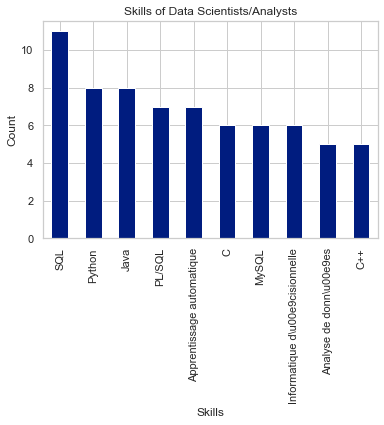

In [306]:
# Specify the position you want to filter by
position = "Data Scientist"

results = collection.aggregate([
    {"$unwind": "$work"},
    {"$unwind": "$skills"},
    {"$match": {"work.position":  { "$regex": position, "$options": "i" }}},
    {"$group": {"_id": "$skills.name", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
])

# Convert the results to a pandas DataFrame
df = pd.DataFrame(list(results))

# Rename the columns to match the skills and count
df.rename(columns={'_id':'skills','count':'count'}, inplace=True)

#print the table
df.head(5)
# Plot the results as a bar chart

df.head(10).plot(kind='bar', x='skills', y='count', legend=False)
plt.xlabel("Skills")
plt.ylabel("Count")
plt.title("Skills of Data Scientists/Analysts")

plt.show()

#### 4 list des competences de chaque profile 

In [210]:
results = collection.aggregate([
    {"$unwind": "$work"},
    {"$unwind": "$skills"},
    {"$group": {"_id": {"person":"$basics.name","skill":"$skills.name"}, "count": {"$sum": 1}}},
    {"$sort": {"count": -1}},
    {"$group": {"_id": "$_id.person", "skills": {"$push": {"skill":"$_id.skill","count":"$count"}}}},
    {"$sort": {"_id": 1}},
    {"$match": {"skills.2": {"$exists": True}}}
])


# Convert the results to a pandas DataFrame
df = pd.DataFrame(list(results))

# Rename the columns to match the skills and count

#print the table
df.head(5)


,_id,skills
0,Abla El bekkali,"[{'skill': 'Oracle Database', 'count': 9}, {'skill': 'MySQL', 'count': 9}, {'skill': 'Intelligence artificielle (IA)', 'count': 9}, {'skill': 'Programmation web', 'count': 9}, {'skill': 'Project Management', 'count': 9}, {'skill': 'C++', 'count': 9}, {'skill': 'S\u00e9curit\u00e9 r\u00e9seau', 'count': 9}, {'skill': 'Blockchain', 'count': 9}, {'skill': 'Technologies de l\u2019information', 'count': 9}, {'skill': 'Python (langage de programmation)', 'count': 9}, {'skill': 'Networking', 'count': 9}, {'skill': 'Cybers\u00e9curit\u00e9', 'count': 9}, {'skill': 'JavaScript', 'count': 9}, {'skill': 'Test d\u2019intrusion', 'count': 9}, {'skill': 'Gestion d'\u00e9quipe', 'count': 9}, {'skill': 'SQL', 'count': 9}, {'skill': 'C (langage de programmation)', 'count': 9}, {'skill': 'Big data', 'count': 9}, {'skill': 'Gestion de projet', 'count': 9}, {'skill': 'Securit\u00e9 des syst\u00e8mes d\u..."
1,Amina Sghiri,"[{'skill': 'language c', 'count': 1}, {'skill': 'Analyse de donn\u00e9es', 'count': 1}, {'skill': 'Base de donn\u00e9es', 'count': 1}, {'skill': 'Hive', 'count': 1}, {'skill': 'SAS', 'count': 1}, {'skill': 'Programmation SAS', 'count': 1}, {'skill': 'Analyses Big Data', 'count': 1}, {'skill': 'Big Data', 'count': 1}, {'skill': 'java', 'count': 1}, {'skill': 'Apache Spark', 'count': 1}, {'skill': 'Talend', 'count': 1}, {'skill': 'Python', 'count': 1}, {'skill': 'Extraire, transformer, charger (ETL)', 'count': 1}, {'skill': 'business intelligence', 'count': 1}, {'skill': 'Informatique d\u00e9cisionnelle', 'count': 1}, {'skill': 'Merise', 'count': 1}, {'skill': 'Data Warehouse', 'count': 1}, {'skill': 'Programmation web', 'count': 1}, {'skill': 'Microsoft Office', 'count': 1}, {'skill': 'Science des donn\u00e9es', 'count': 1}, {'skill': 'machine learning', 'count': 1}, {'skill': 'Intell..."
2,Amine Hamdouchi,"[{'skill': 'Apprentissage supervis\u00e9', 'count': 6}, {'skill': 'Mod\u00e9lisation math\u00e9matique', 'count': 6}, {'skill': 'Apprentissage par renforcement', 'count': 6}, {'skill': 'SQL Server Integration Services (SSIS)', 'count': 6}, {'skill': 'Microsoft Power BI', 'count': 6}, {'skill': 'SPSS', 'count': 6}, {'skill': 'Qlik Sense', 'count': 6}, {'skill': 'Microsoft SQL Server', 'count': 6}]"
3,Anissa ARFAOUI,"[{'skill': 'Python', 'count': 6}, {'skill': 'Time series forecasting', 'count': 6}, {'skill': 'Base de donn\u00e9es', 'count': 6}, {'skill': 'UML', 'count': 6}, {'skill': 'Analyse pr\u00e9dictive', 'count': 6}, {'skill': 'Java', 'count': 6}, {'skill': 'SAS', 'count': 6}, {'skill': 'Merise', 'count': 6}, {'skill': 'Data Analytics', 'count': 6}, {'skill': 'C', 'count': 6}, {'skill': 'Analyse de donn\u00e9es', 'count': 6}, {'skill': 'Deep learning', 'count': 6}, {'skill': 'Entrepreneuriat', 'count': 6}, {'skill': 'Intelligence artificielle', 'count': 6}, {'skill': 'Google Cloud Platform (GCP)', 'count': 6}, {'skill': 'Extraction de contenu web', 'count': 6}, {'skill': 'Apprentissage automatique', 'count': 6}, {'skill': 'Statistiques', 'count': 6}, {'skill': 'Microsoft SQL Server', 'count': 6}, {'skill': 'Gestion de projet', 'count': 6}, {'skill': 'Exploration des donn\u00e9es', 'count':..."
4,Badr EN-NOUKH,"[{'skill': ' Protocoles de routage', 'count': 1}, {'skill': ' Administration', 'count': 1}, {'skill': ' Cisco IOS', 'count': 1}, {'skill': ' Networking', 'count': 1}, {'skill': ' Help Desk Implementation', 'count': 1}, {'skill': 'R\u00e9seaux informatiques', 'count': 1}, {'skill': ' Firewalls', 'count': 1}, {'skill': ' Feuilles de style en cascade (CSS)', 'count': 1}, {'skill': ' Security Information and Event Management (SIEM)', 'count': 1}, {'skill': ' Protocole TCP', 'count': 1}, {'skill': ' Digital Forensics', 'count': 1}, {'skill': ' Suite des protocoles Internet (TCP/IP)', 'count': 1}, {'skill': ' Routeurs', 'count': 1}, {'skill': ' CompTIA', 'count': 1}, {'skill': ' LAN Switching', 'count': 1}, {'skill': ' Administration syst\u00e8me', 'count': 1}, {'skill': ' Protocole Interne

#### 5 les compétences et l'education des profils  qui ont  plus experience ,

In [246]:
results = collection.aggregate([
  { "$project": {
      "name": "$basics.name",
      "work_count": {"$size": "$work"},
      "skills": "$skills",
      "last_education": { "$arrayElemAt": [ "$education", 1 ] }
    }
  },
  { "$unwind": "$skills" },
  { "$group": {
      "_id": "$name",
      "work_count": {"$first": "$work_count"},
      "skills": {"$push": "$skills.name"},
      "skills_count": {"$sum": 1},
      "last_education": {"$last": "$last_education.studyType"}
    }
  },
  { "$project": {

      "work_count": "$work_count",
      "skills": "$skills",
      "skills_count": "$skills_count",
      "last_education": "$last_education"
    }
  },
  { "$sort": { "work_count": -1 } }
])


# Convert the results to a pandas DataFrame
df = pd.DataFrame(list(results))

# Rename the columns to match the skills and count

#print the table
df.head(5)

,_id,work_count,skills,skills_count,last_education
0,Abla El bekkali,9,"[Securit\u00e9 des syst\u00e8mes d\u2019information, Cybers\u00e9curit\u00e9, Blockchain, Iot, Big data, Intelligence artificielle (IA), Python (langage de programmation), S\u00e9curit\u00e9 r\u00e9seau, Cryptographie, Networking, Hacking \u00e9thique, DevOps, Test d\u2019intrusion, Java, JavaScript, SQL, MySQL, Microsoft Office, ITIL, Management services IT, Project Management, C (langage de programmation), Programmation web, Oracle Database, Informatique, Authentification s\u00e9curis\u00e9e, Gestion d'\u00e9quipe, Gestion de projet, Technologies de l\u2019information, C++, Pare-feux, PHP]",32,Master s\u00e9curit\u00e9 des syst\u00e8mes d'information
1,Younes Akhrif,8,"[UML, Java Enterprise Edition, Java, SQL, Team Management, Telecommunications, Hibernate, Eclipse, Oracle, Spring, XML, Project Management, Business Intelligence, Web Services, Spring Framework, GSM, Flex, Linux, MySQL, Software Development, NTT DATA Europe & Latam, Talend Open Studio, AngularJS, Oracle SOA Suite, Amazon Web Services (AWS), Spring Boot, Maven, CXF, RESTful WebServices, Magento, Agile Methodologies, Docker, Unified Modeling Language (UML), Spring Batch, Spring Security, Spring MVC, Scrum, Kubernetes]",38,Ma\u00eetrise en G\u00e9nie informatique
2,HASSNA Ait-Ali,8,"[Object-Oriented Programming (OOP), Machine Learning, Artificial Intelligence (AI), Support Vector Machine (SVM), lora, Secteur de l\u2019\u00e9nergie solaire, G\u00e9nie \u00e9lectrique, Microcontr\u00f4leurs ESP32, Android Studio, C (langage de programmation), Raspberry Pi, \u00c9nergie solaire, Python (langage de programmation), Android, Java, D\u00e9veloppement Android, C, Microcontr\u00f4leurs, \u00c9lectronique num\u00e9rique, Langage d'assemblage, C++, ISIS, Simulink, SQL Server Management Studio, NI Multisim, Arduino, VHDL, IOT, CATIA, Microsoft Excel, \u00c9lectronique, MPLAB, Syst\u00e8mes embarqu\u00e9s, MATLAB, SQL]",35,cycle d'ingenieur
3,Souad Legdani,7,"[Data Analysis Expressions (DAX), JIRA, QA , Microsoft Power BI, Microsoft SQL Server, Microsoft Office, Java, Python, MySQL, SQLite, Linux, Gestion de projet, Planification strat\u00e9gique, Oracle Database, SQL, Administration de bases de donn\u00e9es, C#, Design, C, C++, Ecole Sup\u00e9rieure de Technologie de Casablanca, Scrum, PhpMyAdmin, HTML, Computer Science, MongoDB, M\u00e9thodes agiles, Feuilles de style en cascade (CSS), Algorithmes, Statistiques, Artificial Intelligence (AI), scrum, Informatique d\u00e9cisionnelle, Extraire, transformer, charger (ETL), Comptabilit\u00e9, Data Science, Data Warehouse, machine learning, Traitement de l'image, Windows Server, Strat\u00e9gie de services ITIL, Probabilit\u00e9s, ITIL, Administration syst\u00e8me Linux, Big Data, D\u00e9veloppement de logiciels, JavaScript, Mod\u00e9lisation]",48,Licence professionnelle
4,Amine Hamdouchi,6,"[Microsoft Power BI, Qlik Sense, SQL Server Integration Services (SSIS), Microsoft SQL Server, Mod\u00e9lisation math\u00e9matique, Apprentissage supervis\u00e9, SPSS, Apprentissage par renforcement]",8,phd student


#### 6. Compter	le	nombre	de	profils	qui	maitrise	python	ayant	une	licence	?



In [143]:
result6=collection.aggregate([
    {"$match": {
    "$and": [
      { "education.studyType": { "$regex": "licence", "$options": "i" } },
      { "skills.name": { "$regex": "python", "$options": "i" } },
      { "skills.name": { "$regex": "R", "$options": "i" } }
    ]
  }},
  {"$count": "number of profiles"}
])
data = list(result6)
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   number of profiles
0                  16


#### 7. Idem	que	6	,	mais	maitrisant	aussi	R



In [146]:
result7=collection.aggregate([
    {"$match": {
    "$and": [
      { "education.studyType": { "$regex": "licence", "$options": "i" } },
      { "skills.name": { "$regex": "python", "$options": "i" } },
      { "skills.name": { "$regex": "R", "$options": "i" } }
    ]
  }},
  {"$count": "number of profiles"}
])
data = list(result7)
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   number of profiles
0                  16


#### 7. Idem	que	6	,	mais	maitrisant	aussi	Machine learning 



In [214]:
result7=collection.aggregate([
    {"$match": {
    "$and": [
      { "education.studyType": { "$regex": "licence", "$options": "i" } },
      { "skills.name": { "$regex": "python", "$options": "i" } },
      { "skills.name": { "$regex": "Machine learning", "$options": "i" } }
    ]
  }},
  {"$count": "number of profiles"}
])
data = list(result7)
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   number of profiles
0                   9


#### Compléter	le	programme	(Python)	suivant	afin	d'afficher	les	postes	d’un	profil		
selon	le	format	suivant	:
- poste	1	:
-poste	2	:

In [219]:
# Use a cursor to iterate through the documents
cursor = collection.find({"basics.name":"Abla El bekkali"},{"work":1})

for doc in cursor:
    for index, work in enumerate(doc["work"]):
        print("poste " + str(index + 1) + " : " + work["position"] + " at " + work["name"])

poste 1 : Professor at EMCGI 
poste 2 : Professor at Ecole Marocaine des Sciences de l'ing\u00e9nieur
poste 3 : Author at Research India Publication
poste 4 : Author at IEEE
poste 5 : Professor at Universit\u00e9 Internationale de Rabat
poste 6 : Ing\u00e9nieur en s\u00e9curit\u00e9 des syst\u00e8mes d'information at Renault Group
poste 7 : Ing\u00e9nieur en s\u00e9curit\u00e9 des syst\u00e8mes d'information at Metragaz tanger
poste 8 : Stage en ing\u00e9nierie at SOCI\u00c9T\u00c9 TANG\u00c9ROISE DE MAINTENANCE
poste 9 : STAGE at Banque Populaire du Maroc (Groupe) Inc


#### 9 Analyser Corrélation	entre	les études	et	l’employabilité

correlation entre l'expirience et les annes d'estudes -> 0.40416969898828


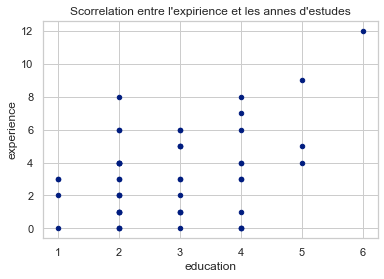

In [301]:
# Perform the aggregation pipeline
pipeline = [
    { "$group": {
        "_id": {"education": "$education"},
        "experience": {"$sum": { "$size": "$work" }},
        "education": {"$sum":  { "$size": "$education" }}
    }},
    { "$sort": {"experience": -1}}
]
results = list(collection.aggregate(pipeline))

# Create a Pandas DataFrame from the results
df = pd.DataFrame(results)
# Calculate the correlation between education and experience
correlation = df['education'].corr(df['experience'])
print("correlation entre l'expirience et les annes d'estudes ->",correlation)
df.plot(kind='scatter', x='education', y='experience', legend=False)
plt.xlabel("education")
plt.ylabel("experience")
plt.title("Scorrelation entre l'expirience et les annes d'estudes")

plt.show()

#### 11. Quelles	entreprises	qui	ont	embauché	ces	data	scientists	?	On	pourra	les	classer	:
- Entreprise	de Classe	A	:	>	3
- Enterprise	de	Classe	B	:	compris	entre	2	et	3
- Enterprise	de	Classe	C	:	<2

In [307]:
pipeline = [
    {"$unwind": "$work"},
    {"$group": {"_id": "$work.name", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
]

result = collection.aggregate(pipeline)

class_a = []
class_b = []
class_c = []

for company in result:
    if company["count"] > 3:
        class_a.append(company["_id"])
    elif 2 <= company["count"] <= 3:
        class_b.append(company["_id"])
    else:
        class_c.append(company["_id"])

print("Entreprise de Classe A:",class_a, len(class_a))
print(" nombre Entreprise de Classe B:", len(class_b))
print("nombre Entreprise de Classe C:", len(class_c))

Entreprise de Classe A: ['Heliantha', 'Attijariwafa bank', 'SQLI'] 3
 nombre Entreprise de Classe B: 23
nombre Entreprise de Classe C: 107
